Na etapa de EDA, o grupo deve realizar uma análise exploratória abrangente para entender a estrutura, qualidade, distribuições, relações entre variáveis (numéricas e categóricas) e desafios, como missing values e vieses, preparando para encoding e modelagem nas fases subsequentes.
Descrição do Dataset: O dataset Adult consiste em 48.842 instâncias, cada uma representando um indivíduo com 14 features mistas e o target 'income'. Valores ausentes são representados por '?'. Use o conjunto completo para EDA, mas amostras estratificadas (por income) para visualizações eficientes se necessário.

Tarefas básicas de EDA:

1. Carregamento e inspeção inicial dos dados:

    - Explicar cada feature do dataset;
    - Verificar o número de instâncias e features.
    - Identificar tipos de dados (numéricos, categóricos).
    - Detectar valores ausentes ('?') e inconsistências.
    - Analisar a distribuição do target 'income'.

2. Análise univariada:

    - Para variáveis numéricas: calcular estatísticas descritivas (média, mediana, desvio padrão) e criar histogramas ou boxplots.
    - Para variáveis categóricas: calcular frequências e criar gráficos de barras.
    - Detectar outliers em variáveis numéricas usando boxplots ou z-scores.

3. Análise bivariada e multivariada:

    - Analisar correlações entre variáveis numéricas usando matrizes de correlação e scatter plots (use heatmaps para visualização).
    - Analisar relações entre variáveis categóricas e o target 'income' usando gráficos de barras ou tabelas de contingência.
    - Analisar relações entre variáveis numéricas e categóricas usando boxplots ou violin plots.

4. Análise de qualidade dos dados:

    - Identificar e quantificar valores ausentes.
    - Analisar a distribuição de classes no target 'income' para detectar desequilíbrios.
    - Identificar possíveis vieses ou inconsistências nos dados.

5. Pré-processamento para modelagem:

    - Propor estratégias para lidar com valores ausentes (remoção, imputação).
    - Propor estratégias para lidar com outliers (remoção, transformação).
    - Propor estratégias para lidar com desequilíbrios de classe (undersampling, oversampling).
    - Propor estratégias para encoding de variáveis categóricas (one-hot encoding, label encoding).
    - Propor estratégias para normalização ou padronização de variáveis numéricas (Min-Max Scaling, Standardization, etc.).
    - Construir um pipeline de pré-processamento que inclua as etapas acima, garantindo que seja aplicável para as fases de modelagem subsequentes.

6. Redução de dimensionalidade:

    - Propor e aplicar técnicas de redução de dimensionalidade, como PCA, t-SNE ou UMAP, para visualizar a estrutura dos dados e identificar possíveis agrupamentos ou padrões.
    - Analisar os resultados da redução de dimensionalidade para obter insights sobre a separabilidade das classes e a importância das features.

7. Documentação e apresentação:

    - Documentar todas as etapas da análise, incluindo insights e decisões tomadas. **Justificar as escolhas de pré-processamento com base nos achados da EDA.**
    - Sugerir feature engineering baseada nos insights da EDA, como criação de novas features a partir das existentes (ex: idade em grupos, interações entre variáveis).
    - Criar visualizações claras e informativas para comunicar os resultados da EDA.
    - Preparar um relatório que resuma os principais achados e as estratégias propostas para a modelagem.
    - Discutir as limitações do dataset e os desafios que podem surgir durante a modelagem, como overfitting, underfitting, ou problemas de generalização.
    - Discutir implicações das descobertas através das análises do dataset para:

        - Regressão, e;
        - Classificação.

Instruções adicionais:

- O código deve ser bem organizado, com comentários explicativos para cada etapa.
- As visualizações devem ser claras, com títulos, rótulos e legendas adequados
- O relatório deve ser conciso, focando nos insights mais relevantes e nas decisões de pré-processamento.
- O grupo deve justificar todas as escolhas de pré-processamento com base nos achados da EDA, garantindo que as estratégias propostas sejam adequadas para os desafios identificados no dataset.
- O relatório deve incluir uma seção de conclusões, resumindo os principais insights e as estratégias propostas para a modelagem, além de discutir as limitações do dataset e os desafios que podem surgir durante a modelagem.
- Python obrigatório, utilizando bibliotecas como Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, entre outras para análise e visualização dos dados.


EDA

1. Carregamento e inspeção inicial dos dados:

    - Explicar cada feature do dataset;
    - Verificar o número de instâncias e features.
    - Identificar tipos de dados (numéricos, categóricos).
    - Detectar valores ausentes ('?') e inconsistências.
    - Analisar a distribuição do target 'income'.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# fetch dataset
adult = fetch_ucirepo(id=2)

In [3]:
# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# dataframe final para EDA
df = pd.concat([X, y], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Aqui notamos uma incongruencia que precisamos tratar, era para o target ser totalmente binario, com income <=50K e income >50K, mas temos 4 tipos. Isso provavelmente se dá pois temos algumas instâncias terminando em ponto. Vamos tratar isso

In [5]:
# tratando a coluna do target para remover inconsistência
df["income"] = df["income"].replace({"<=50K.": "<=50K", ">50K.": ">50K"})

df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Tratamos to target, conforme exploramos nossas features, teremos que tratar mais dados

### Temos aqui 14 features (além do target) e aproximadamente 16 mil instâncias

# Variáveis quantitativas

#### Discretas:
**age** → idade → quantitativa discreta

**education-num** → anos de estudo → quantitativa discreta

**hours-per-week** → horas por semana → quantitativa discreta

#### Contínuas:

**fnlwgt** → peso amostral → quantitativa contínua

**capital-gain** → ganho de capital → quantitativa contínua

**capital-loss** → perda de capital → quantitativa contínua

# Variáveis qualitativas

#### Categóricas:

**workclass** → tipo de emprego → qualitativa categórica

**marital-status** → estado civil → qualitativa categórica

**occupation** → profissão → qualitativa categórica

**relationship** → relação familiar → qualitativa categórica

**race** → raça → qualitativa categórica

**sex** → sexo → qualitativa categórica

**native-country** → país de origem → qualitativa categórica

**income** → faixa de renda → qualitativa categórica (binária)

#### Ordinais:

**education** → nível de escolaridade → qualitativa ordinal

# Vamos agora dividir nossa database e explora-la um pouco mais

Análise Univariada:


In [6]:
X = df.drop('income', axis=1).copy()
y = df['income'].copy() #target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

Vamos olhar melhor para nossas variaveis

In [10]:
X_train.select_dtypes(include=['number']).agg([
    "mean",
    "median",
    "std",
    "min",
    "max",
    lambda x: x.quantile(0.75) - x.quantile(0.25)
])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
mean,38.632662,1.900070e+05,10.077675,1091.418038,87.276610,40.400788
median,37.000000,1.782720e+05,10.000000,0.000000,0.000000,40.000000
std,13.737816,1.058195e+05,2.565268,7500.039346,402.816969,12.393669
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000
<lambda>,20.000000,1.205630e+05,3.000000,0.000000,0.000000,5.000000


In [9]:
y_train.value_counts()

income
<=50K    29741
>50K      9332
Name: count, dtype: int64

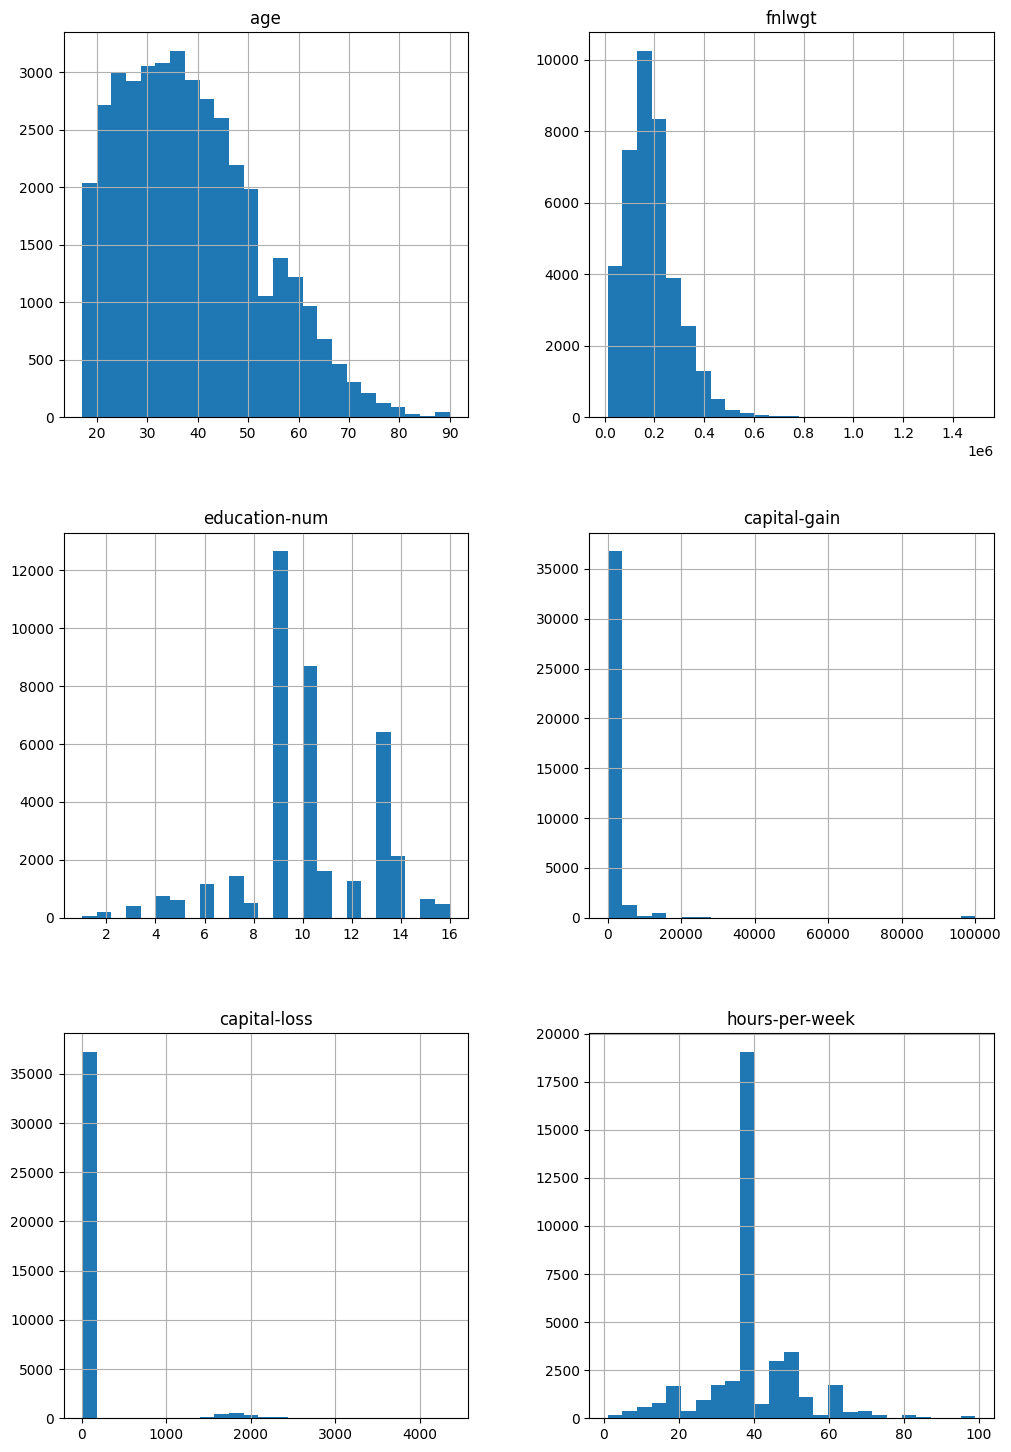

In [13]:
X_train.select_dtypes(include=['number']).hist(
    bins = 25,
    figsize = (12, 18)
)

plt.show()

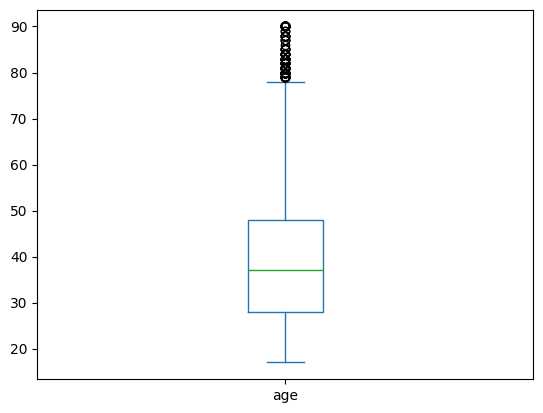

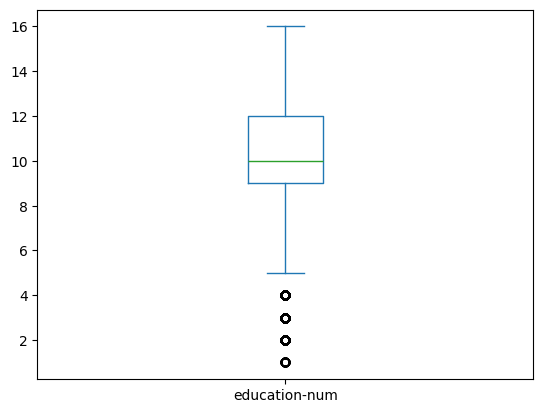

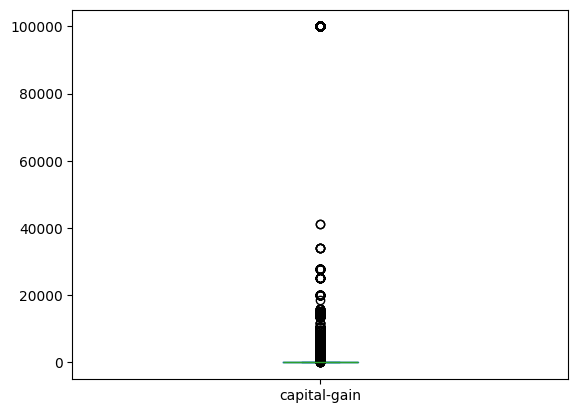

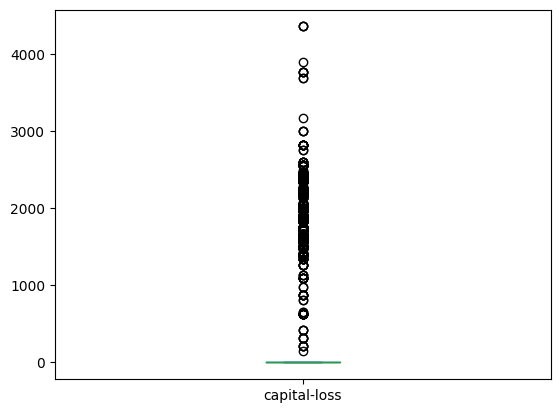

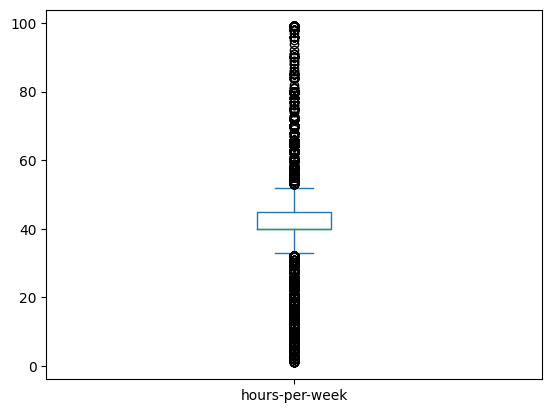

In [11]:
X_train["age"].plot.box()
plt.show()

X_train["education-num"].plot.box()
plt.show()

X_train["capital-gain"].plot.box()
plt.show()

X_train["capital-loss"].plot.box()
plt.show()

X_train["hours-per-week"].plot.box()
plt.show()

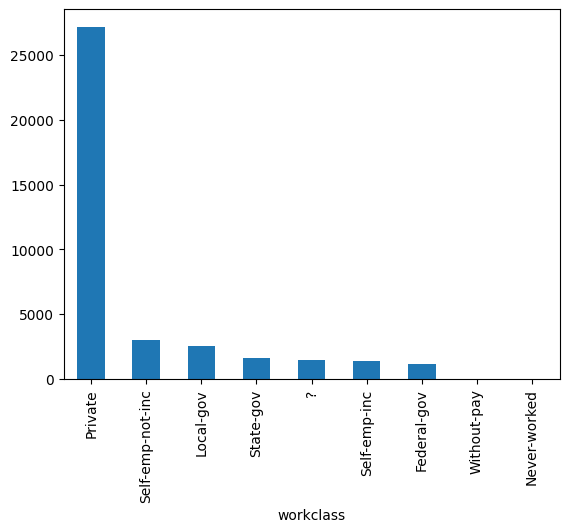

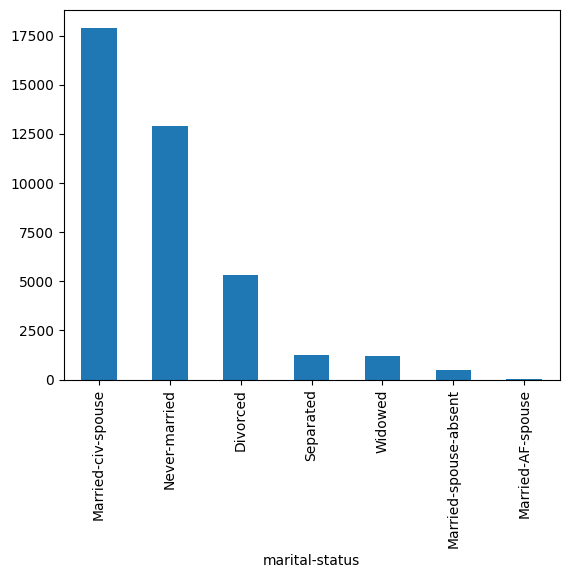

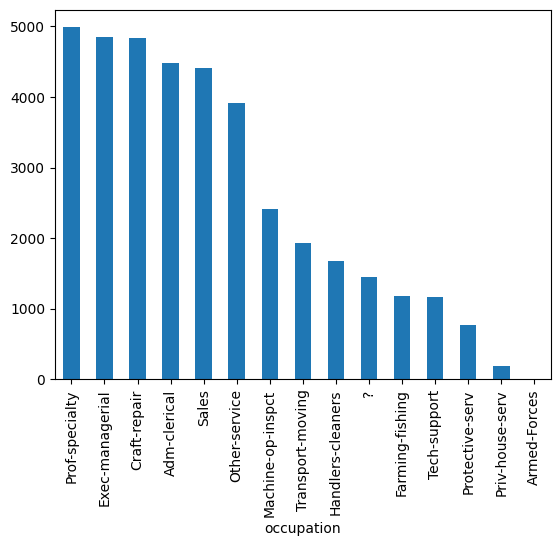

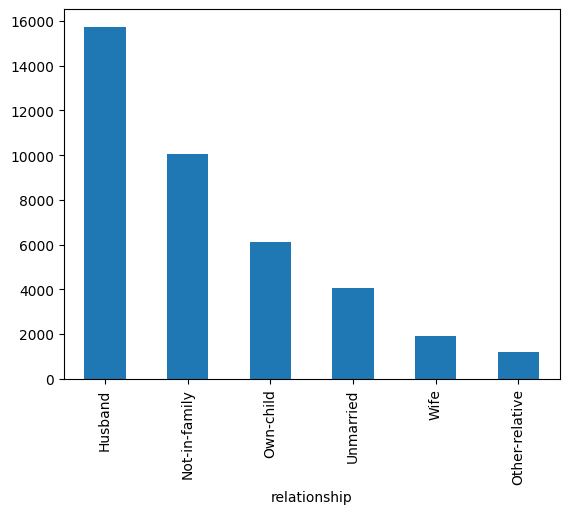

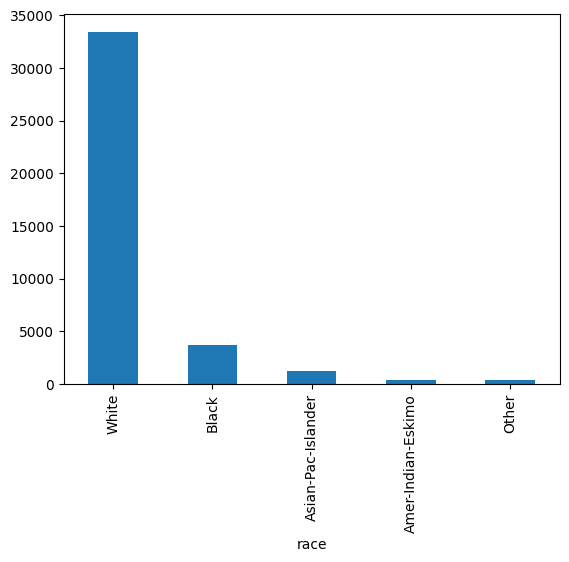

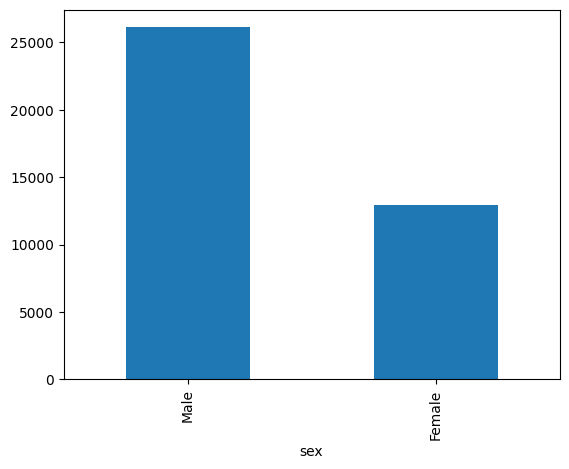

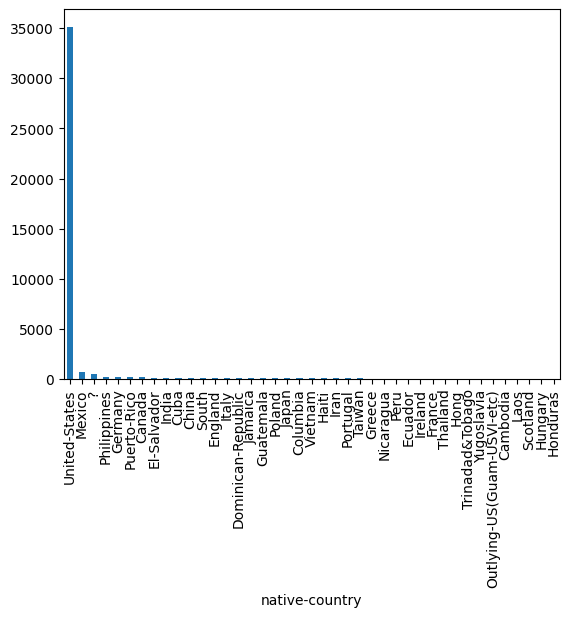

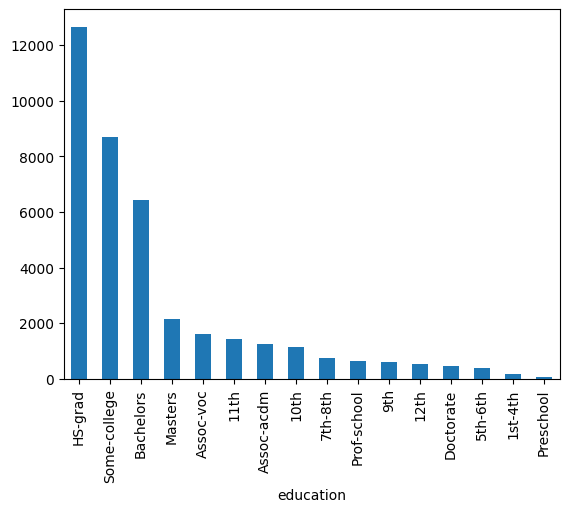

In [14]:
X_train["workclass"].value_counts().plot.bar()
plt.show()

X_train["marital-status"].value_counts().plot.bar()
plt.show()

X_train["occupation"].value_counts().plot.bar()
plt.show()

X_train["relationship"].value_counts().plot.bar()
plt.show()

X_train["race"].value_counts().plot.bar()
plt.show()

X_train["sex"].value_counts().plot.bar()
plt.show()

X_train["native-country"].value_counts().plot.bar()
plt.show()

X_train["education"].value_counts().plot.bar()
plt.show()


## o que podemos observar até o momento

Aqui a gente pode evidenciar algumas propriedades a respeito das nossas features:

Age: Concentra-se da faixa dos 30 aos 50

education-num: Poucos outliers, concentração em torno de 10-12 anos

Capital-gain: enorme parte dos dados estão zerados, indicando talvez irrelevancia dessa feature para treino do nosso modelo

Capital-loss: enorme parte dos dados estão zerados, indicando talvez irrelevancia dessa feature para treino do nosso modelo

Hours-per-week: enorme concentracao em torno de 40 horas

workclass: enorme concentracao em Private, contem uma categoria sem nome

marital-status: distribuicao util pra nossa eda

occupation: possui uma categoria sem nome, da pra supor pelo contexto que essa categoria representa aqueles sem ocupação, mas isso é inconclusivo.

relationship: distribuicao util pra nossa eda.

race: muito concentrada na raça branca

sex: maioria masculina

native country: gigantesca maioria dos estados unidos, obviamente, mas isso não indica que essa feature é irrelevante pro nosso modelo, muito pelo contrario, alguns paises especificos podem estar associados a baixo income (paises com alto indice de refugiados), enquanto outros podem indicar income muito alto.

# Analise bivariada

Entre váriáveis numéricas:

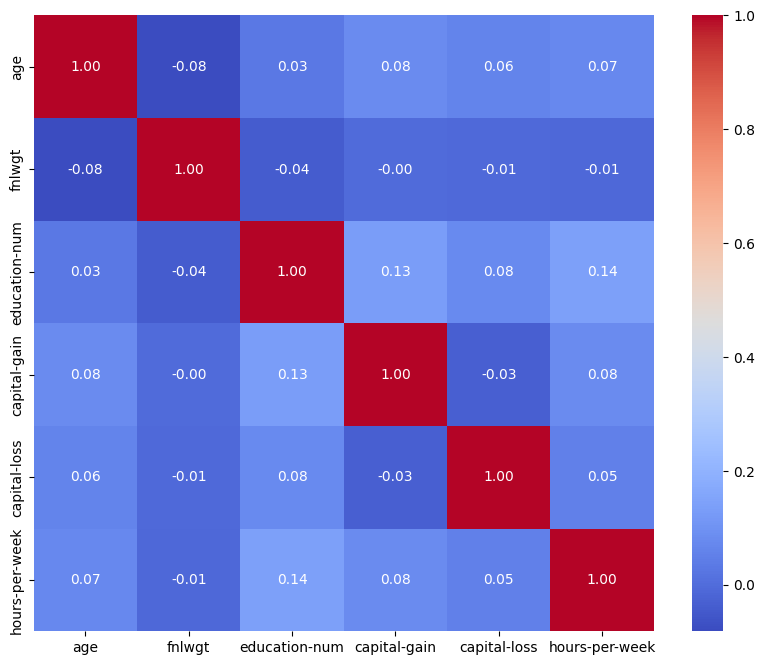

In [17]:
df_corr = X_train.select_dtypes(include=['number']).copy()

corr = df_corr.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr, 
            annot=True,
            cmap="coolwarm",
            fmt=".2f")
plt.show()

Entre variváveis categóricas

In [18]:
# variáveis categóricas automaticamente (tudo que NÃO é number)
cat_cols = X_train.select_dtypes(exclude=["number"]).columns.tolist()
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [19]:
# dataframe auxiliar para cruzar categóricas com o target
df_cat_target = X_train[cat_cols].copy()
df_cat_target["income"] = y_train.values

In [22]:
# tabelas de contingência (contagem e proporção por linha)
# for col in cat_cols:
#     print(f"\n{'='*70}\nVariável: {col}\n{'='*70}")
    
#     tabela_contagem = pd.crosstab(df_cat_target[col], df_cat_target["income"])
#     tabela_prop = pd.crosstab(
#         df_cat_target[col],
#         df_cat_target["income"],
#         normalize="index"
#     ).round(3)

#     print("Tabela de contingência (contagem):")
#     display(tabela_contagem)

#     print("Tabela de contingência (proporção por categoria):")
#     display(tabela_prop)

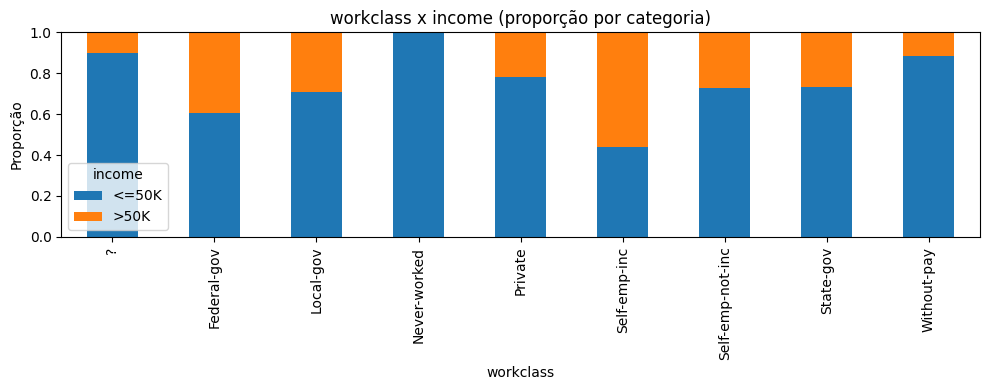

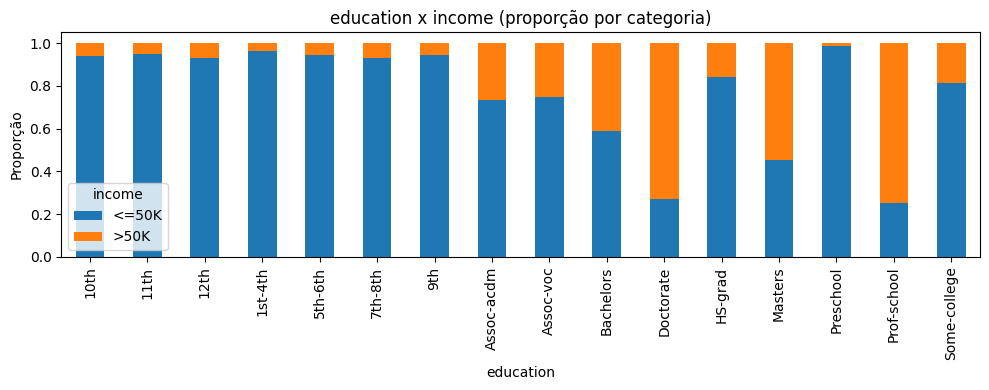

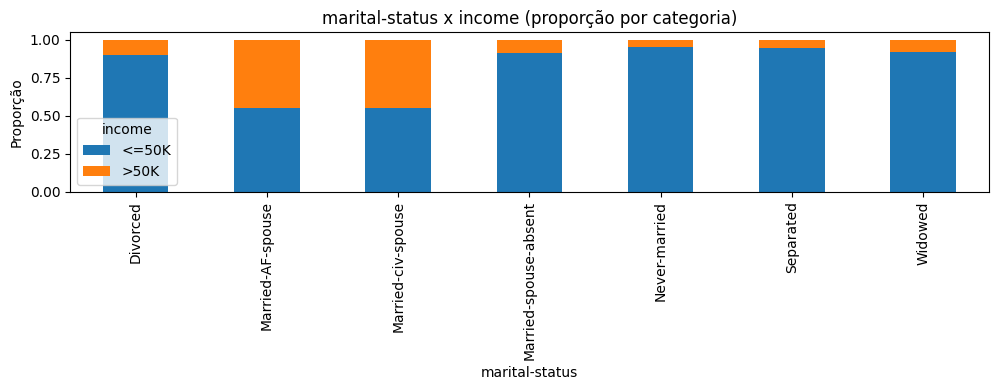

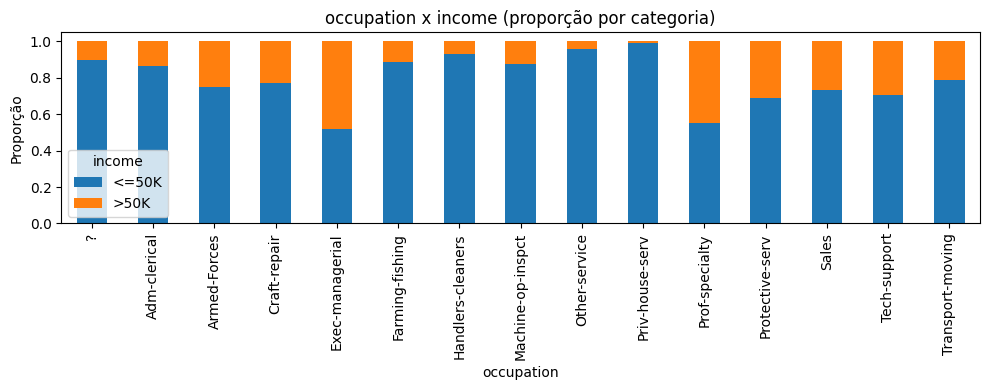

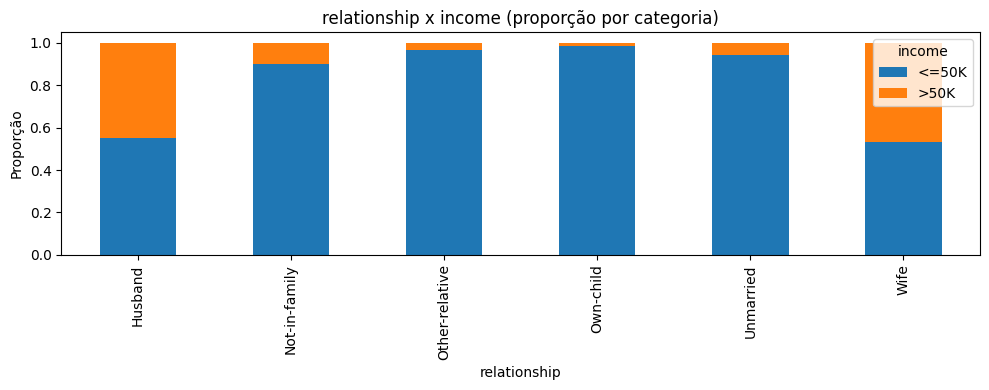

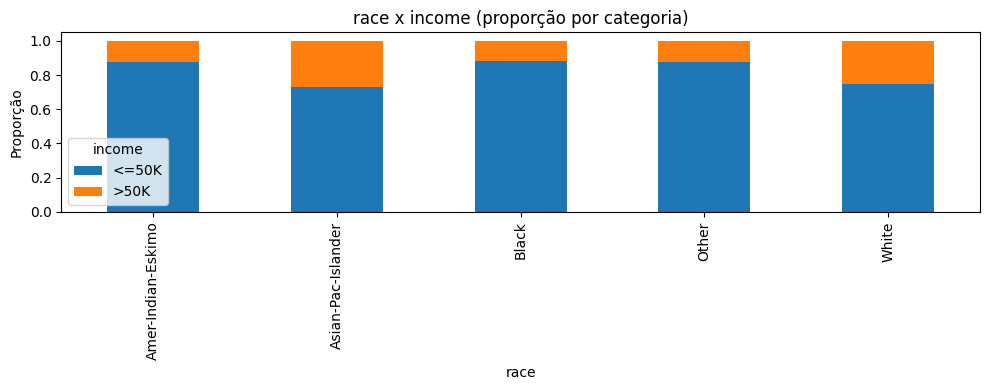

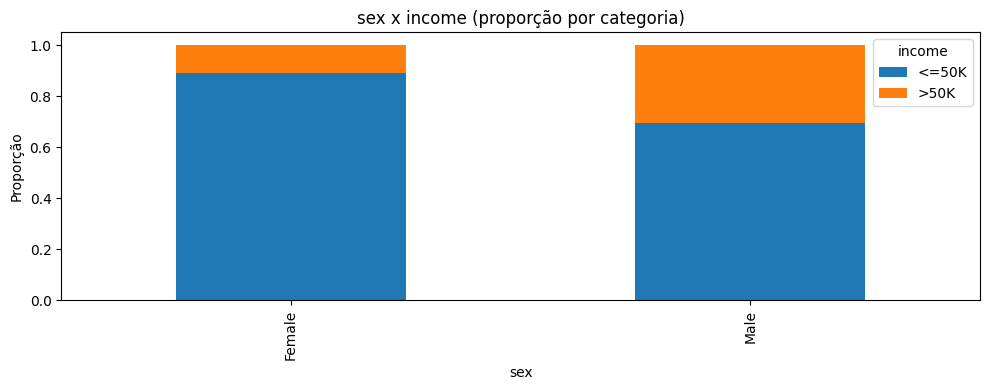

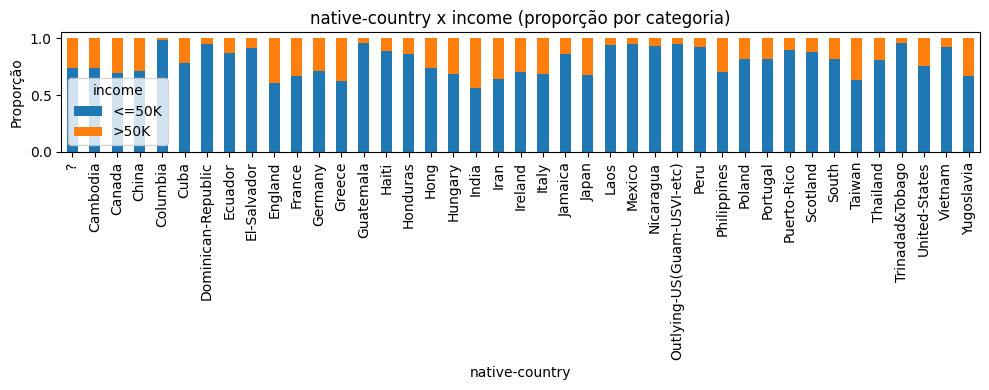

In [21]:
# gráficos de barras (proporção de income dentro de cada categoria)
for col in cat_cols:
    tabela_prop = pd.crosstab(
        df_cat_target[col],
        df_cat_target["income"],
        normalize="index"
    )

    tabela_prop.plot(kind="bar", stacked=True, figsize=(10, 4))
    plt.title(f"{col} x income (proporção por categoria)")
    plt.xlabel(col)
    plt.ylabel("Proporção")
    plt.legend(title="income")
    plt.tight_layout()
    plt.show()